# Simple calculations of the Rossby number

This will be an attempt to calculate the rossby number of a star across its radius for varius rotation rates.

In [2]:
import numpy as np
import scipy.constants as sc
import astropy.constants as ac
import astropy.units as u
import matplotlib.pyplot as plt

### $ R_o = {{u \cdot \nabla u} \over { 2 \Omega \times u}}$
simplifying to $ R_o ={u \over {2 \Omega L }}$
and $ u \propto \bigl( {{F(r)} \over {\rho(r)}} \bigr) ^{1/3} $ where L is relavent length scale and 
$ F = {{Luminosity} \over {4 \pi r^2}} $

In [4]:
def Ross(velocity, omega, length):
    """Calculating a rossby number. Using the simplified eq"""
    Ro = velocity / (2 * omega * length)
    return Ro

In [5]:
def Velo( F,den):
    u = (F/den)**(1/3)
    return u

Test numbers

### Importing data
file contains radius, speed of sound, density, pressure, gamma, temperature

In [8]:
infilename = 'modelS_cptrho.l5bi.d.15c.txt' #limited set of vars, easy to parse
data = np.genfromtxt(infilename, unpack=True)
# if using simple-format file:
radius = data[0]
cs = data[1]
rho = data[2]
pressure = data[3]
gamma_1 = data[4]
temperature = data[5]

In [9]:
len(rho)

2482

using 0.75 R_sun for flux radius as lfux will drop off from core. and core is roughly 2% of radius

25 day rotaion period is roughly 450nHz

In [11]:
radius[0]

1.0007126

In [12]:
rot1 = 450e-9
rot2 = 900e-9
rot3 = 225e-9
rot4 = 100e-9

leng = 6.96e8 *0.3
Luminosity = 3.83e26 
Mass = 1.99e30
print(len(rho))
rad = radius * 6.96e8
density = rho * 1000     #multiply by 1000 to convert to SI
#print(int(np.floor(len(rad)*0.8)))
flux = Luminosity / ( 4* np.pi * np.power((0.80*rad),2))

2482


C:\Users\bensh\AppData\Local\Temp\ipykernel_24856\3742182133.py:13: RuntimeWarning: divide by zero encountered in divide
  flux = Luminosity / ( 4* np.pi * np.power((0.80*rad),2))


##### Flipping the flux as radius and density run from surface to core. Brings it inline with these.

In [16]:
flux = np.flip(flux)

##### going to remove the inner 20% of the radius data points so that the flux begins at the edge of fusion. will also have to remove the outer 20% of flux data.

Done by creating new arrays and assinging the value to it one by one. Since the arrays run surface to "core" you can assign them one by one until about 80% of the way through then stop. thus avoiding the "core"

In [18]:
#print(len(flux))
#print(flux)

outer_rad = []
outer_flux = []
outer_density = []

for i in range((int(np.floor(len(rad)*0.8)))):
   
    outer_rad.append(radius[i])
    outer_flux.append(flux[i])
    outer_density.append(density[i])
    #print(i)


outer_rad = np.array(outer_rad)
outer_flux = np.array(outer_flux)
outer_density = np.array(outer_density)

#print(len(outer_flux))
#print(outer_flux)

In [19]:
print(outer_rad)

[1.0007126 1.0007047 1.0006968 ... 0.1778957 0.1770875 0.1762817]


print(rad)

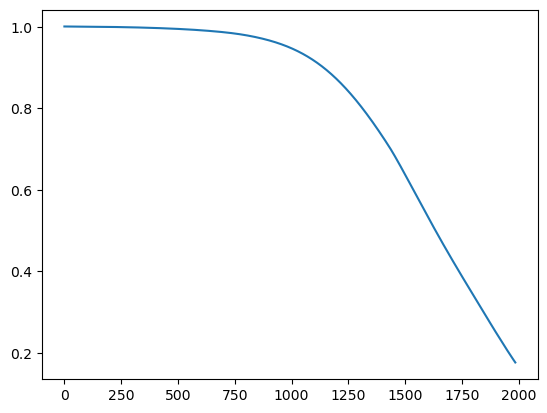

In [21]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(outer_rad)

Text(0, 0.5, 'F')

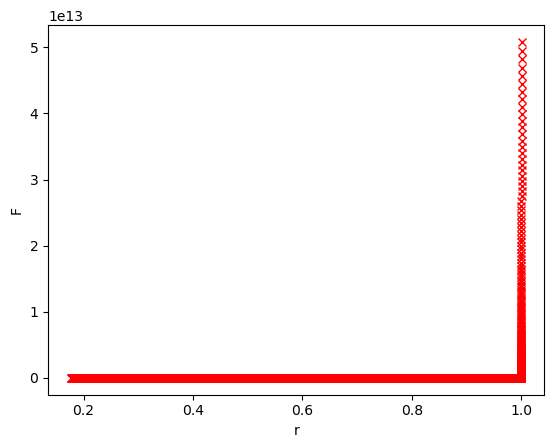

In [22]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.plot(outer_rad, outer_flux, linestyle = " ", marker = "x", color = "red")
ax1.set_xlabel("r")
ax1.set_ylabel("F")
#ax1.set_yscale('log')
#ax1.set_xlim(0.5*Radius,)
#ax1.set_ylim(0,1e9)
#ax1.legend()
#fig1.suptitle("Insert title", fontsize = "15")

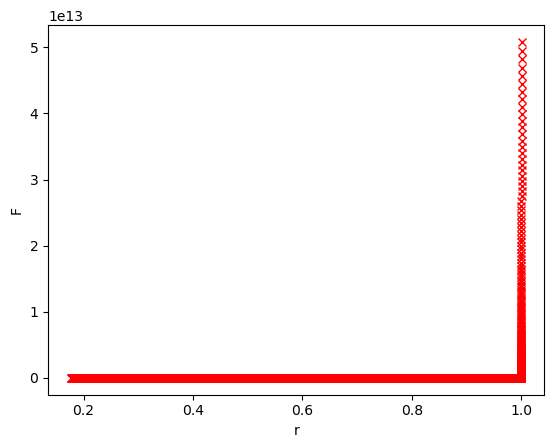

In [23]:
#ax1.set_xlim(0.5*Radius,)
#ax1.set_ylim(0,1e9)
fig1

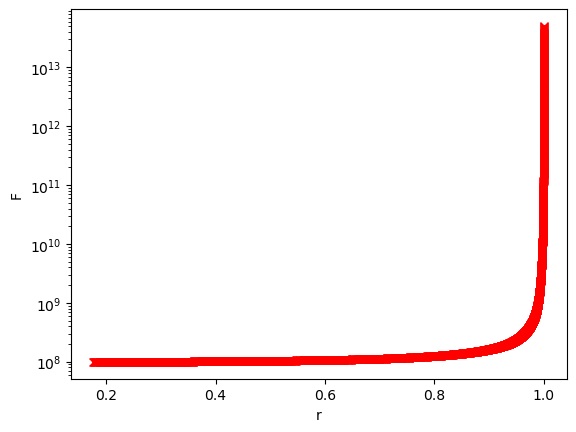

In [24]:
#ax1.set_xlim(0,7.5e8)
#ax1.set_ylim(1e7,1e13)
ax1.set_yscale('log')
fig1

##### Calcluating velocity

with $ u \propto \bigl( {{F(r)} \over {\rho(r)}} \bigr) ^{1/3} $ 

In [26]:
vel = Velo(outer_flux, outer_density)

##### Claulcating rossby number with $ R_o ={u \over {2 \Omega L }}$

In [28]:
rossby_number1 = Ross(vel, rot1, leng)
rossby_number2 = Ross(vel, rot2, leng)
rossby_number3 = Ross(vel, rot3, leng)
rossby_number4 = Ross(vel, rot4, leng)

Text(0.5, 0.98, 'Rossby nuumber for constant rotation')

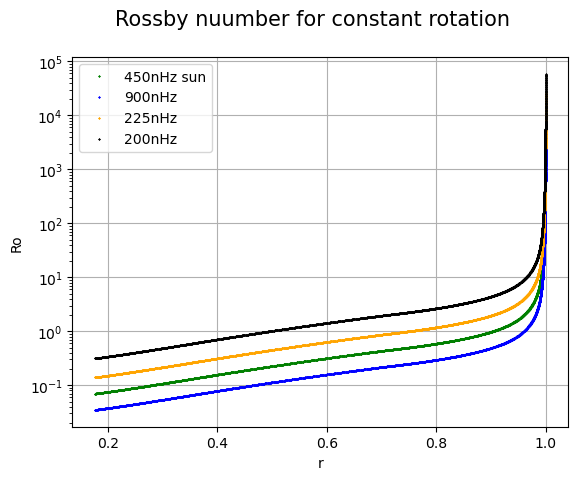

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(outer_rad, rossby_number1, linestyle = " ", marker = "x", label = "450nHz sun", color = "green", markersize = 1)
ax.plot(outer_rad, rossby_number2, linestyle = " ", marker = "x", label = "900nHz", color = "blue", markersize = 1)
ax.plot(outer_rad, rossby_number3, linestyle = " ", marker = "x", label = "225nHz", color = "orange", markersize = 1)
ax.plot(outer_rad, rossby_number4, linestyle = " ", marker = "x", label = "200nHz", color = "black", markersize = 1)
ax.set_xlabel("r")
ax.set_ylabel("Ro")
#ax.set_xticks(np.arange(0,8e8,0.5e8))
#ax.set_yticks(np.arange(0, 5, 0.2))
#ax.set_ylim(0,5)

ax.set_yscale('log')
ax.legend()
ax.grid()
fig.suptitle("Rossby nuumber for constant rotation", fontsize = "15")

#ax.set_xlim(0.5*Radius,)
#ax.set_ylim(0,4)
#ax.set_xticks(np.arange(3e8,8e8,0.5e8))
#ax.set_yticks(np.arange(0,0.25,20))
ax.grid()
fig